In [1]:
from analysis import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from matplotlib import rc

In [2]:
rc('text', usetex=True)
rc('font', family='sans-serif')

In [3]:
eps_set = np.array([[0.05, 80], [0.1143, 56], [0.1786, 41], 
                    [0.2429, 32], [0.3071, 29], [0.3714, 25], [0.4357, 24], [0.5, 24]])
eps_thresh = [j for (i,j) in eps_set]
data_path = "arm3_eps/data"
files = get_files_in_directory(data_path)
N = len(files)

In [4]:
pop_acc = []
for f in files:
    pid, df, acc = load(f, eps_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
print(pop_mean_acc)

610284a1a38509a6059d1bc9,1.4
5f764794f90c7d0ca0eb15df,1.12
5f8040a15e9c0003ae16dc31,1.0
60c47bdfde98f62c0f688ae3,1.01
611ffdb45eb3cf8c95508295,1.15
5fbfb99036e420313c504a36,1.1
61038917dbab6d0d7f203eef,1.06
0.6200000000000001


# theoretical predictions

In [5]:
path = '../model/sims/'
df_eps = pd.read_csv(path+'eps_simulate_100_0725run.csv')

Text(0.5, 1.0, 'Model predictions for mean commitment time as a function of $\\epsilon$')

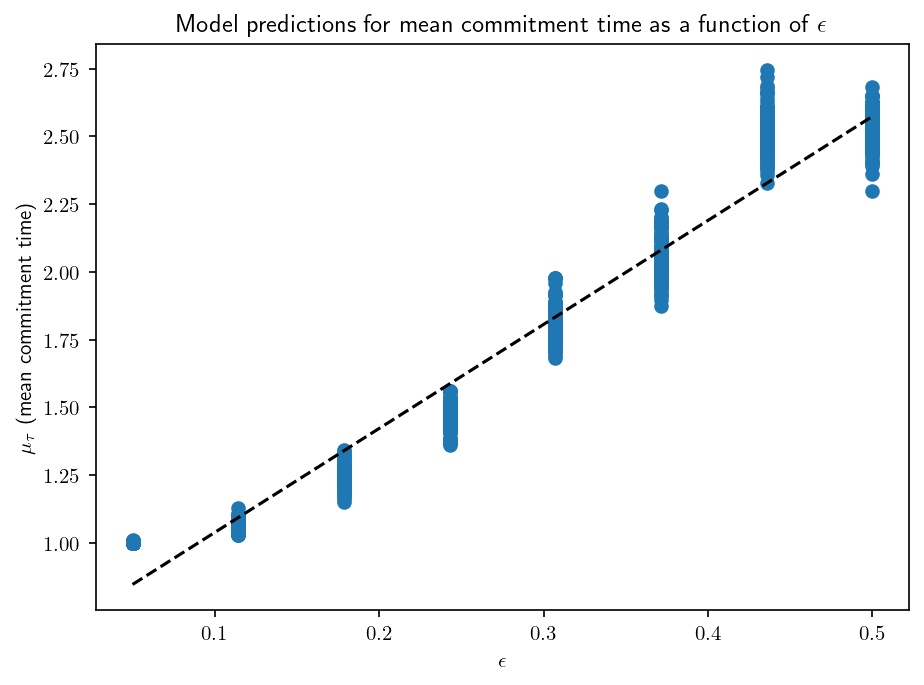

In [6]:
fig, ax = plt.subplots(figsize=(7,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
x,y = np.array(df_eps['eps']).reshape(-1,1), np.array(df_eps['mu_i']).reshape(-1,1)
plt.scatter(x,y)
fit_eps, fit_mu, __, __ = get_linear_fit(x,y)
plt.plot(fit_eps, fit_mu, 'k--')
plt.xlabel('$\epsilon$')
plt.ylabel('$\mu_\\tau$ (mean commitment time)')
plt.title('Model predictions for mean commitment time as a function of $\epsilon$')

# comparison before and after discarding first 70 trials

610284a1a38509a6059d1bc9,1.4
5f764794f90c7d0ca0eb15df,1.12
5f8040a15e9c0003ae16dc31,1.0
60c47bdfde98f62c0f688ae3,1.01
611ffdb45eb3cf8c95508295,1.15
5fbfb99036e420313c504a36,1.1
61038917dbab6d0d7f203eef,1.06
610284a1a38509a6059d1bc9,1.4
5f764794f90c7d0ca0eb15df,1.12
5f8040a15e9c0003ae16dc31,1.0
60c47bdfde98f62c0f688ae3,1.01
611ffdb45eb3cf8c95508295,1.15
5fbfb99036e420313c504a36,1.1
61038917dbab6d0d7f203eef,1.06
610284a1a38509a6059d1bc9,1.4
5f764794f90c7d0ca0eb15df,1.12
5f8040a15e9c0003ae16dc31,1.0
60c47bdfde98f62c0f688ae3,1.01
611ffdb45eb3cf8c95508295,1.15
5fbfb99036e420313c504a36,1.1
61038917dbab6d0d7f203eef,1.06
610284a1a38509a6059d1bc9,1.4
5f764794f90c7d0ca0eb15df,1.12
5f8040a15e9c0003ae16dc31,1.0
60c47bdfde98f62c0f688ae3,1.01
611ffdb45eb3cf8c95508295,1.15
5fbfb99036e420313c504a36,1.1
61038917dbab6d0d7f203eef,1.06


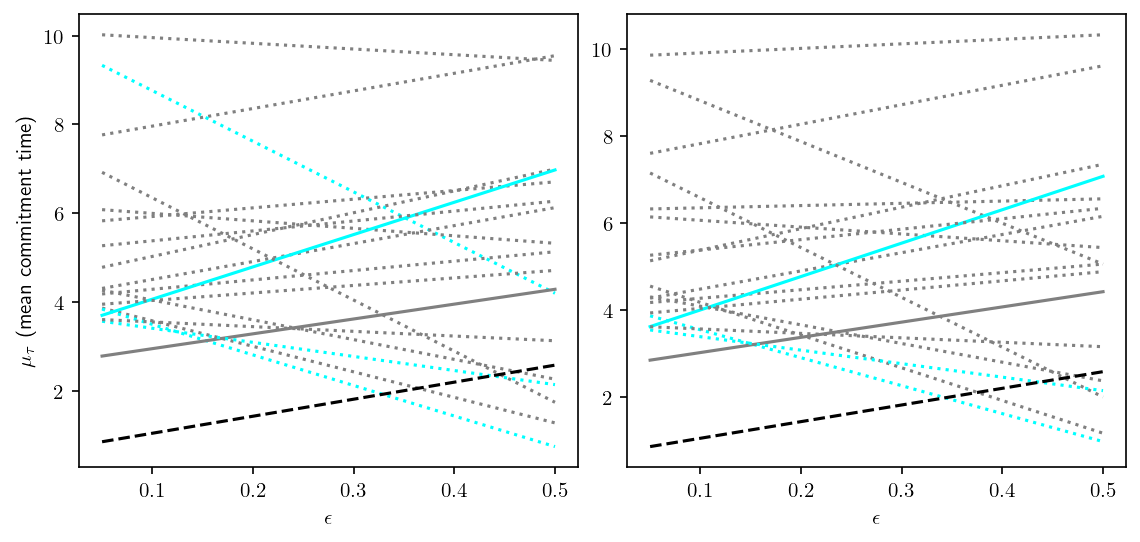

In [7]:
fig, ax = plt.subplots(figsize=(9,4),dpi=150)
plt.subplots_adjust(wspace=0.1)
plt.subplot(121)
pop_acc = []
for f in files:
    pid, df, acc = load(f, eps_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc = load(f, eps_thresh)
    if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
        __, eps, mu_i, __ = get_mean_iai(df)
        x,y,l,c = get_linear_fit(eps,mu_i)
        plt.plot(x,y, linestyle = l, c=c)
plt.xlabel('$\epsilon$')
plt.ylabel('$\mu_\\tau$ (mean commitment time)')
plt.plot(fit_eps, fit_mu, 'k--')


plt.subplot(122)
discard = 70
pop_acc = []
for f in files:
    pid, df, acc = load(f, eps_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc = load(f, eps_thresh)
    if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
        __, eps, mu_i, __ = get_mean_iai(df, discard)
        x,y,l,c = get_linear_fit(eps,mu_i)
        plt.plot(x,y, linestyle = l, c=c)
plt.xlabel('$\epsilon$')
plt.plot(fit_eps, fit_mu, 'k--')

610284a1a38509a6059d1bc9,1.4
5f764794f90c7d0ca0eb15df,1.12
5f8040a15e9c0003ae16dc31,1.0
60c47bdfde98f62c0f688ae3,1.01
611ffdb45eb3cf8c95508295,1.15
5fbfb99036e420313c504a36,1.1
61038917dbab6d0d7f203eef,1.06


Text(0.5, 1.0, 'Accuracy across blocks for arm3\\_eps')

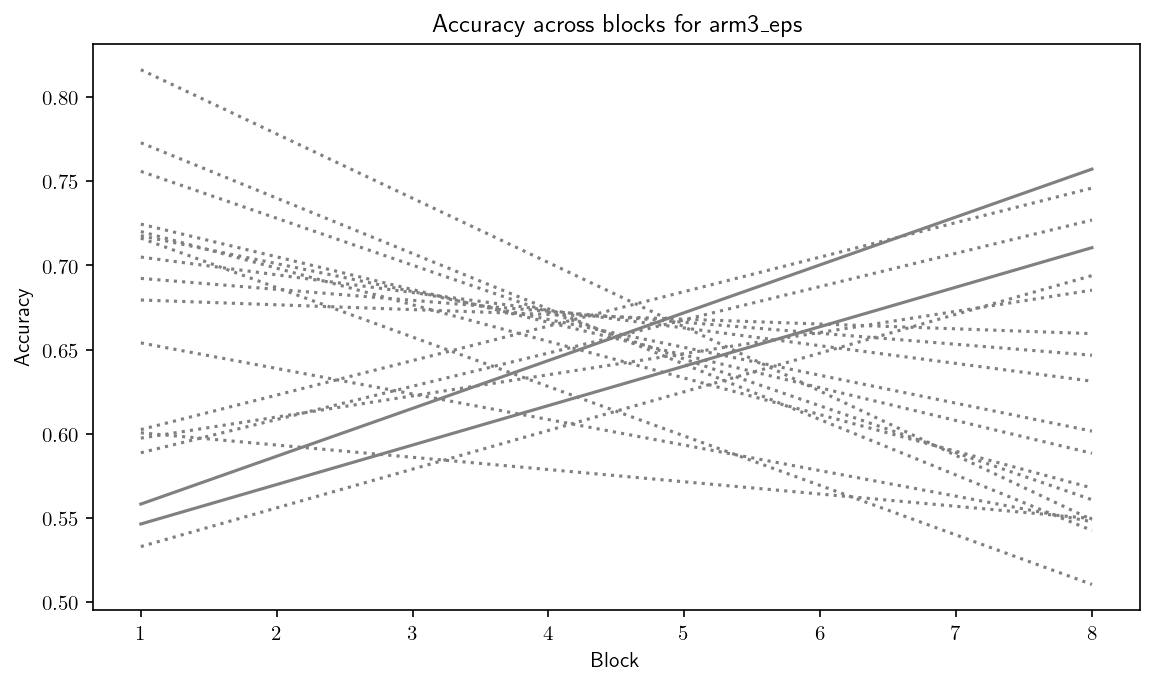

In [8]:
fig, ax = plt.subplots(figsize=(9,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
for f in files:
    pid, df, acc = load(f, eps_thresh)
    if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
        __, eps, acc_i = get_accuracy(df)
        rounds = np.linspace(1,8,8).reshape(-1,1)
        x,y,l,c = get_linear_fit(rounds,acc_i)
        plt.plot(x,y, linestyle = l, c=c)
plt.xlabel('Block')
plt.ylabel('Accuracy')
plt.title('Accuracy across blocks for arm3\_eps')
# plt.plot(fit_q, fit_mu, 'k--')

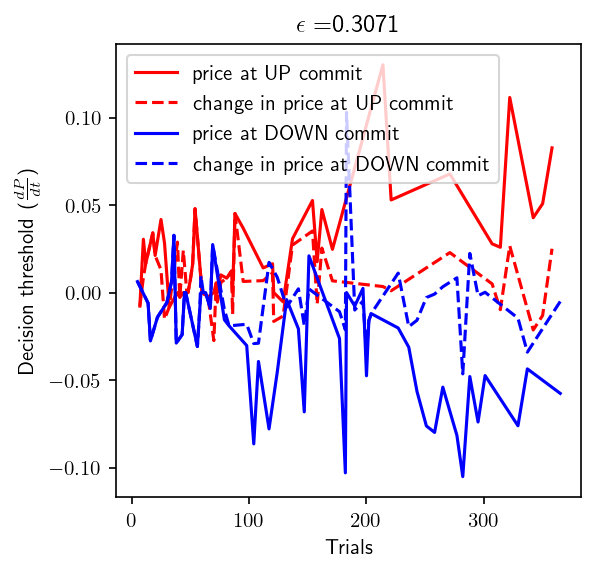

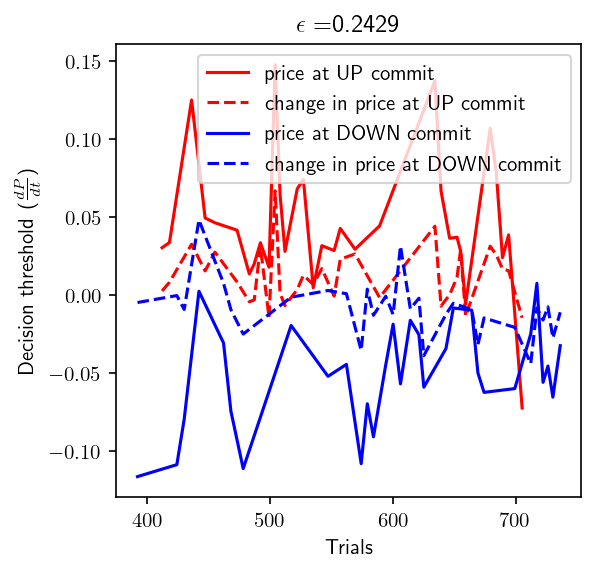

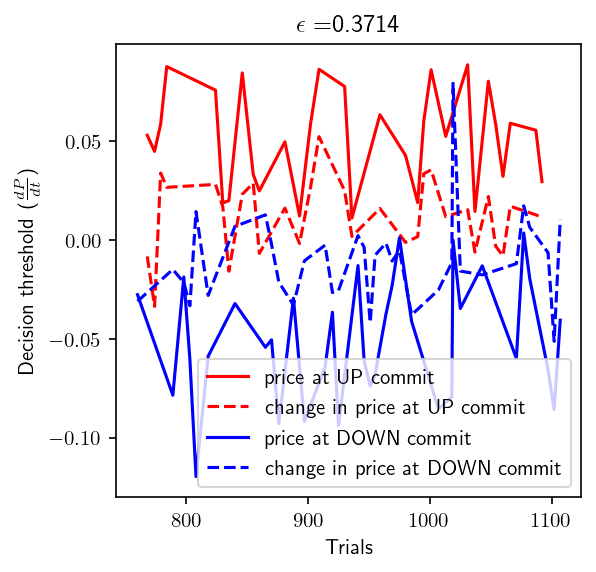

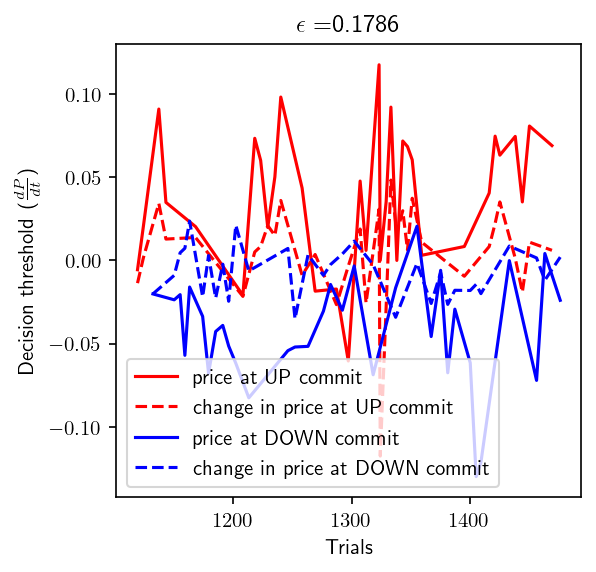

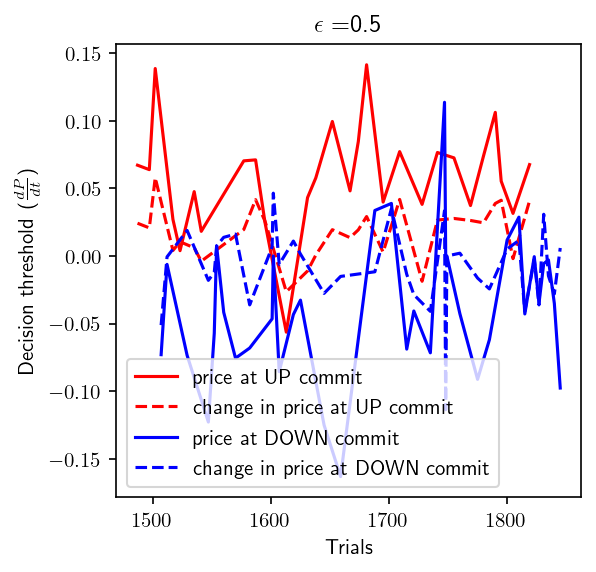

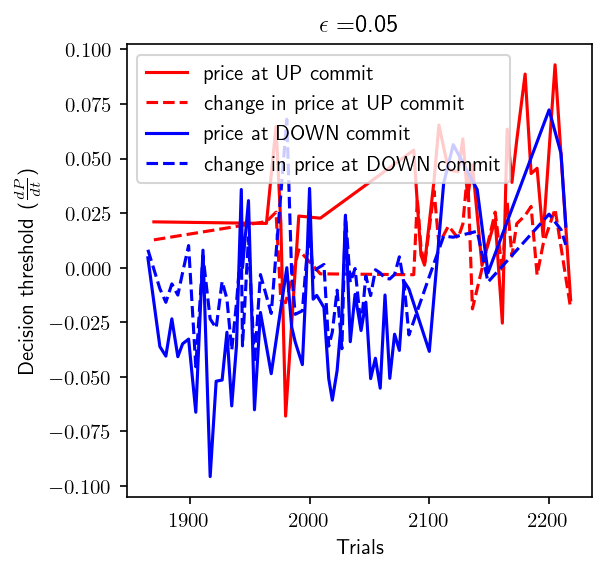

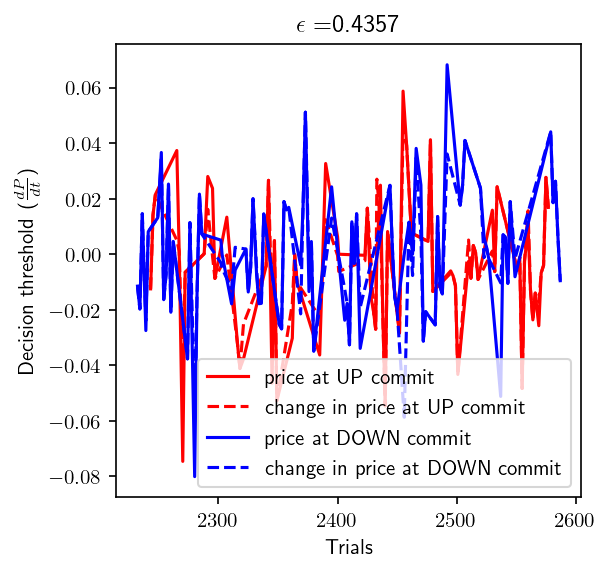

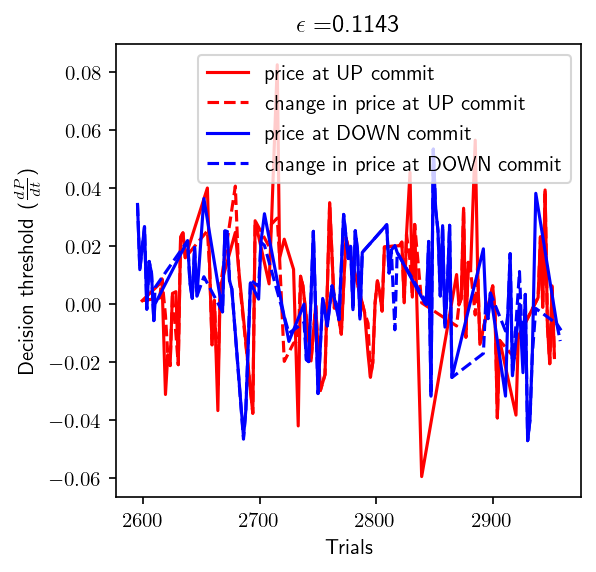

In [25]:
for i in range(1,numBlocks+1):
    fig, ax = plt.subplots(figsize=(4,4),dpi=150)
    curBlock = block(i,df, 0)
    ups = curBlock.index[curBlock['resp.keys'] == 1]
    ups = ups - 1
    ups = ups[1:]
    downs = curBlock.index[curBlock['resp.keys'] == -1]
    downs = downs - 1
    downs = downs[1:]
    both = curBlock.index[np.abs(curBlock['resp.keys']) == 1]
    both = both - 1
    both = both[1:]
    plt.plot(df.iloc[ups]['price'], 'r', label = 'price at UP commit')
    plt.plot(df.iloc[ups]['dPrice_dt'], 'r--', label = 'change in price at UP commit')
    plt.plot(df.iloc[downs]['price'], 'b', label = 'price at DOWN commit')
    plt.plot(df.iloc[downs]['dPrice_dt'], 'b--', label = 'change in price at DOWN commit')
    plt.xlabel('Trials')
    plt.ylabel('Decision threshold ($\\frac{dP}{dt}$)')
    plt.title('$\epsilon = $' + str(curBlock['eps_prob'].iloc[0]))
    plt.legend()
    plt.show()

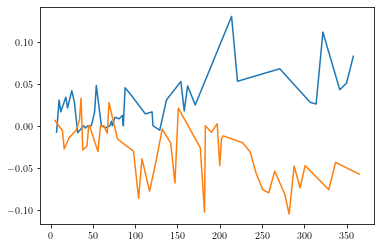

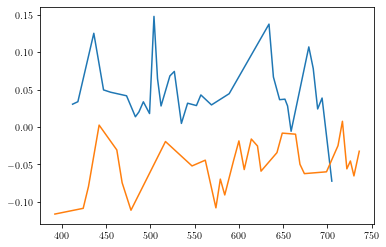

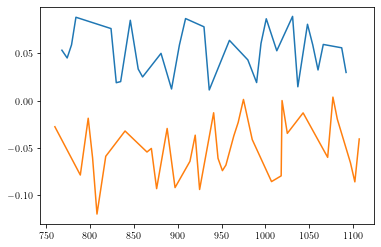

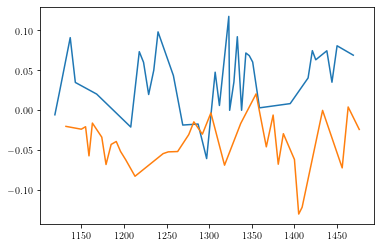

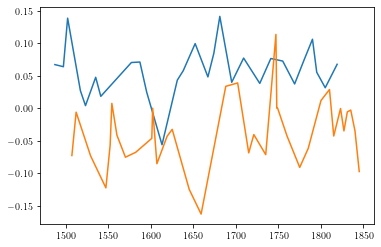

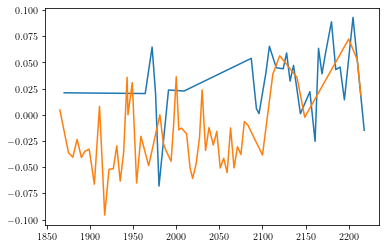

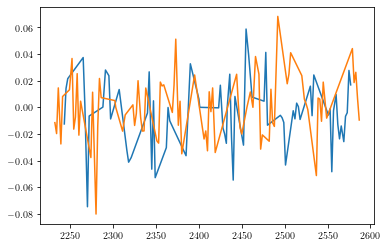

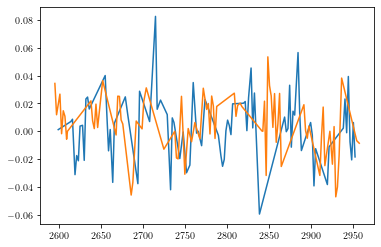

In [22]:
for i in range(1,numBlocks+1):
    curBlock = block(i,df, 0)
    ups = curBlock.index[curBlock['resp.keys'] == 1]
    ups = ups - 1
    ups = ups[1:]
    downs = curBlock.index[curBlock['resp.keys'] == -1]
    downs = downs - 1
    downs = downs[1:]
    plt.plot(df.iloc[ups]['price'])
    plt.plot(df.iloc[downs]['price'])
    plt.show()

In [9]:
df

,resp.keys,state,q_prob,eps_prob,score,price,resp.rt,steps.thisN,commit,dPrice_dt
0,0,1.0,0.3,0.3071,0.0,0.045032,5.0698,0.0,0,0.045032
1,0,1.0,0.3,0.3071,0.0,0.068369,2.6023,1.0,0,0.023337
2,1,1.0,0.3,0.3071,0.0,0.000000,0.8501,2.0,1,-0.068369
3,0,1.0,0.3,0.3071,0.0,0.019509,1.2616,3.0,0,0.019509
4,-1,1.0,0.3,0.3071,0.0,0.000000,1.0185,4.0,1,-0.019509
...,...,...,...,...,...,...,...,...,...,...
2955,0,1.0,0.3,0.1143,96.0,-0.006777,0.0170,365.0,0,-0.006777
2956,-1,1.0,0.3,0.1143,96.0,0.000000,0.1168,366.0,1,0.006777
2957,0,1.0,0.3,0.1143,96.0,0.004173,0.0336,367.0,0,0.004173
2958,0,1.0,0.3,0.1143,96.0,-0.008588,0.1540,368.0,0,-0.012761


In [23]:
curBlock

,resp.keys,state,q_prob,eps_prob,score,price,resp.rt,steps.thisN,commit,dPrice_dt
0,0,1.0,0.3,0.3071,0.0,0.045032,5.0698,0.0,0,0.045032
1,0,1.0,0.3,0.3071,0.0,0.068369,2.6023,1.0,0,0.023337
2,1,1.0,0.3,0.3071,0.0,0.000000,0.8501,2.0,1,-0.068369
3,0,1.0,0.3,0.3071,0.0,0.019509,1.2616,3.0,0,0.019509
4,-1,1.0,0.3,0.3071,0.0,0.000000,1.0185,4.0,1,-0.019509
...,...,...,...,...,...,...,...,...,...,...
365,0,-1.0,0.3,0.3071,15.0,-0.057628,0.1511,365.0,0,-0.005075
366,-1,-1.0,0.3,0.3071,15.0,0.000000,0.2878,366.0,1,0.057628
367,0,-1.0,0.3,0.3071,15.0,-0.027561,0.3873,367.0,0,-0.027561
368,0,-1.0,0.3,0.3071,15.0,-0.045487,0.1466,368.0,0,-0.017926
